## 电影评论分类：二分类问题

### 1、加载IMDB数据集

In [17]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

# num_words=10000的意思是仅保留训练数据前10000个最常出现的单词，低评单词将被舍弃。

## 2、准备数据 
### 将列表转换为张量  
#### 对列表进行one-hot编码，比如序列[3, 5]将会被转换为10000维向量，只有索引为3和5的元素是1，其余元素是0，然后网络第一层可以用Dense层，它能够处理浮点数向量数据。

In [18]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension)) #创建一个零矩阵
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1. #将results[i]的指定索引设为1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 3、构建网络

In [19]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

## 4、配置学习过程

In [20]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

## 5、验证

In [21]:
# 1、留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 2、训练模型
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))
# validation_data参数监控样本上的损失和精度

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 14s 930us/step - loss: 0.5084 - acc: 0.7815 - val_loss: 0.3796 - val_acc: 0.8690
Epoch 2/20
15000/15000 [==============================] - 5s 343us/step - loss: 0.3005 - acc: 0.9046 - val_loss: 0.3002 - val_acc: 0.8902
Epoch 3/20
15000/15000 [==============================] - 4s 264us/step - loss: 0.2179 - acc: 0.9287 - val_loss: 0.3084 - val_acc: 0.8710
Epoch 4/20
15000/15000 [==============================] - 4s 253us/step - loss: 0.1751 - acc: 0.9435 - val_loss: 0.2841 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 4s 271us/step - loss: 0.1426 - acc: 0.9543 - val_loss: 0.2848 - val_acc: 0.8866
Epoch 6/20
15000/15000 [==============================] - 4s 287us/step - loss: 0.1149 - acc: 0.9651 - val_loss: 0.3153 - val_acc: 0.8773
Epoch 7/20
15000/15000 [==============================] - 4s 278us/step - loss: 0.0979 - acc: 0.9707 - val_loss: 0.3128 -

## 6、绘制（可以不用）

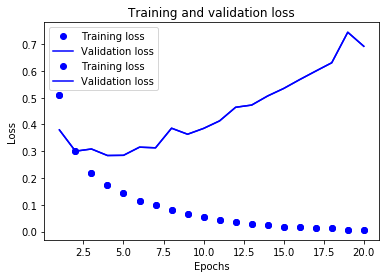

In [23]:
# 1、绘制训练损失和验证损失
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

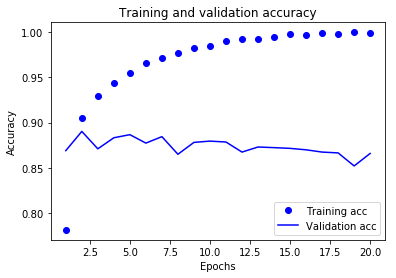

In [24]:
# 2、绘制训练精度和验证精度
plt.clf()  # 清空图像
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 6、在新数据上生成预测结果

In [25]:
model.predict(x_test)

array([[0.00731767],
       [0.9999999 ],
       [0.9625729 ],
       ...,
       [0.00219198],
       [0.00527593],
       [0.7868844 ]], dtype=float32)

## 要点：

#### （1）通常需要对原始数据进行大量预处理，以便将其转换为张量输入到神经网络中。单词序列可以编码为二进制向量，但也有其他编码方式。

#### （2）relu激活的Dense层堆叠，可以解决很多种问题（包括情感分类），你可能会经常用到这种模型

#### （3）对于二分类问题（两个输出类别），网络的最后一层应该是只有一个单元并使用sigmoid激活的Dense层，网络输出应该是0-1范围内的标量，表示概率值。

#### （4）对于二分类问题的sigmoid变量输出，你应该使用binary_crossentropy损失函数

#### （5）无论你的问题是什么，rmsprop优化器通常都是足够好的选择。这一点无需担心

#### （6）随着神经网络在训练数据上的表现越来越好，模型最终会过拟合，并在前所未见的数据上得到越来越差的结果。一定要一直监控模型在训练集之外的数据上的性能